Step 1: Preprocessing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/19. Income prediction.csv')

In [3]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [3]:
# Drop rows with missing values (if any)
dataset.dropna(inplace=True)

# Drop duplicate rows if any
dataset.drop_duplicates(inplace=True)

In [4]:
# define Numeric features
numeric_features = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week','income_>50K']
#define non-Numeric features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'gender', 'native-country']

dataset.drop(columns=['race'], inplace=True)

Step 2: Exploratary Data Analysis

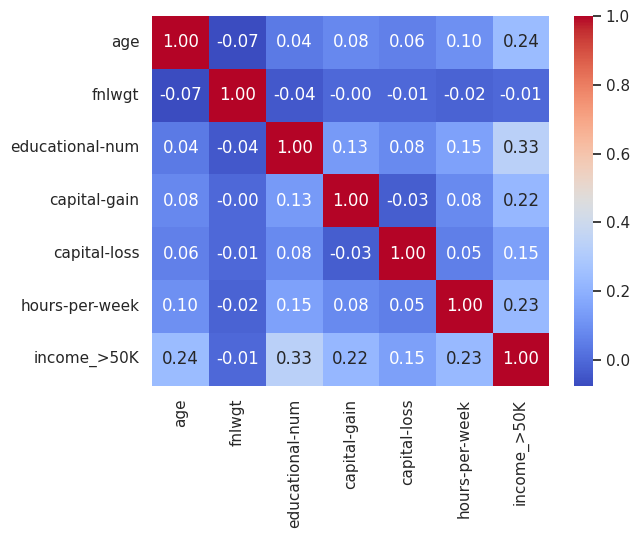

In [6]:
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [5]:
dataset.rename(columns={'income_>50K': 'exceeds50K'}, inplace=True)

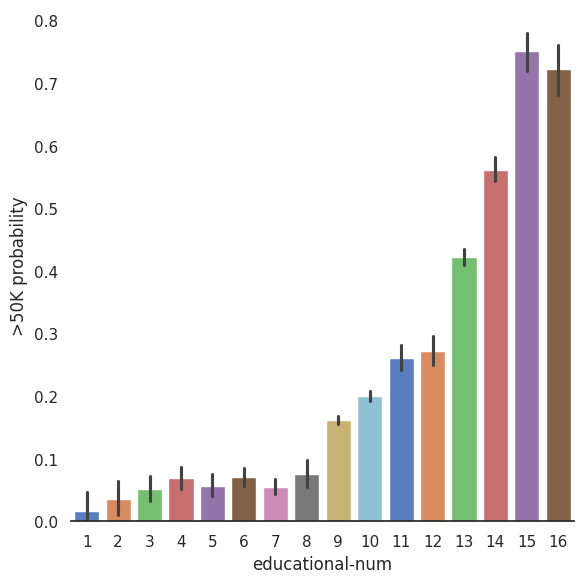

In [11]:
g = sns.catplot(x="educational-num",y="exceeds50K",data=dataset,kind="bar",height = 6,palette = "muted") # Use catplot instead and change 'size' to 'height' and corrected column name
g.despine(left=True)
g = g.set_ylabels(">50K probability")
plt.show()

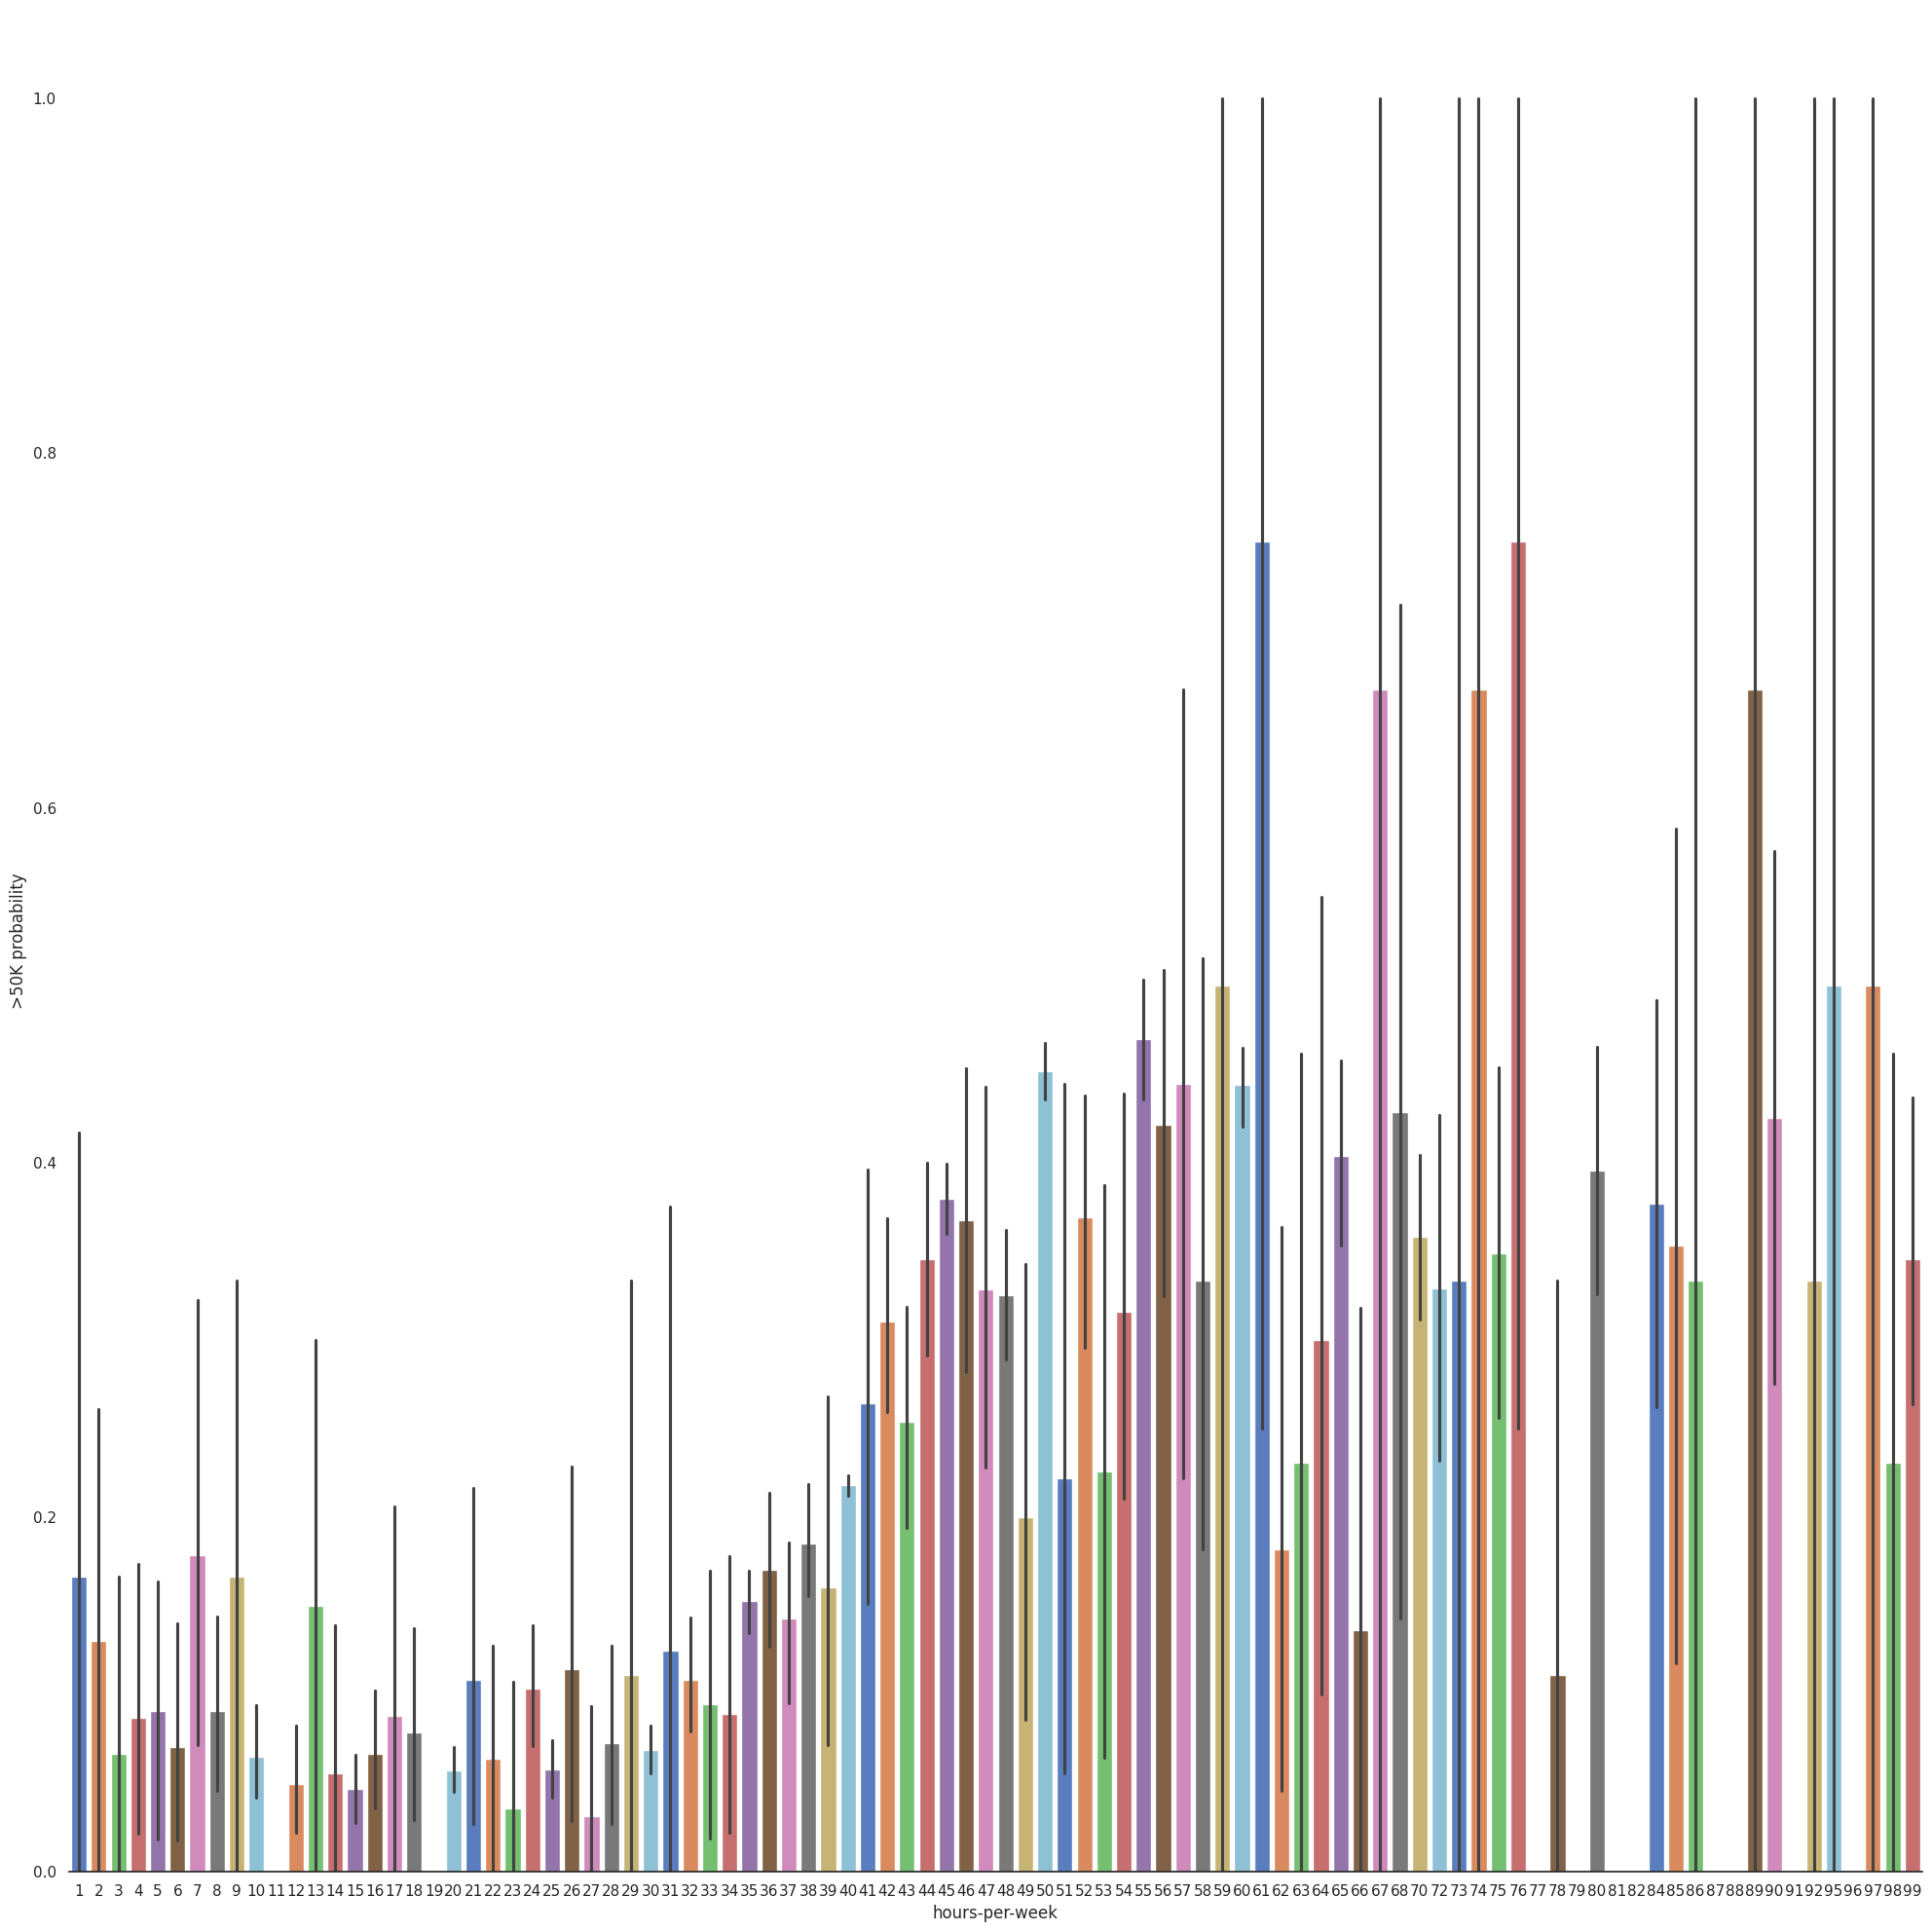

In [14]:
# Explore Hours Per Week vs Income
g  = sns.catplot(x="hours-per-week",y="exceeds50K",data=dataset,kind="bar",height = 20,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")
plt.show()

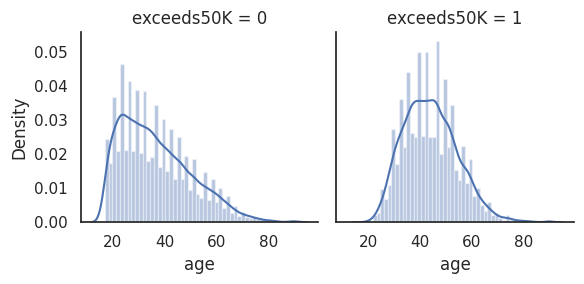

In [15]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='exceeds50K')
g = g.map(sns.distplot, "age")
plt.show()

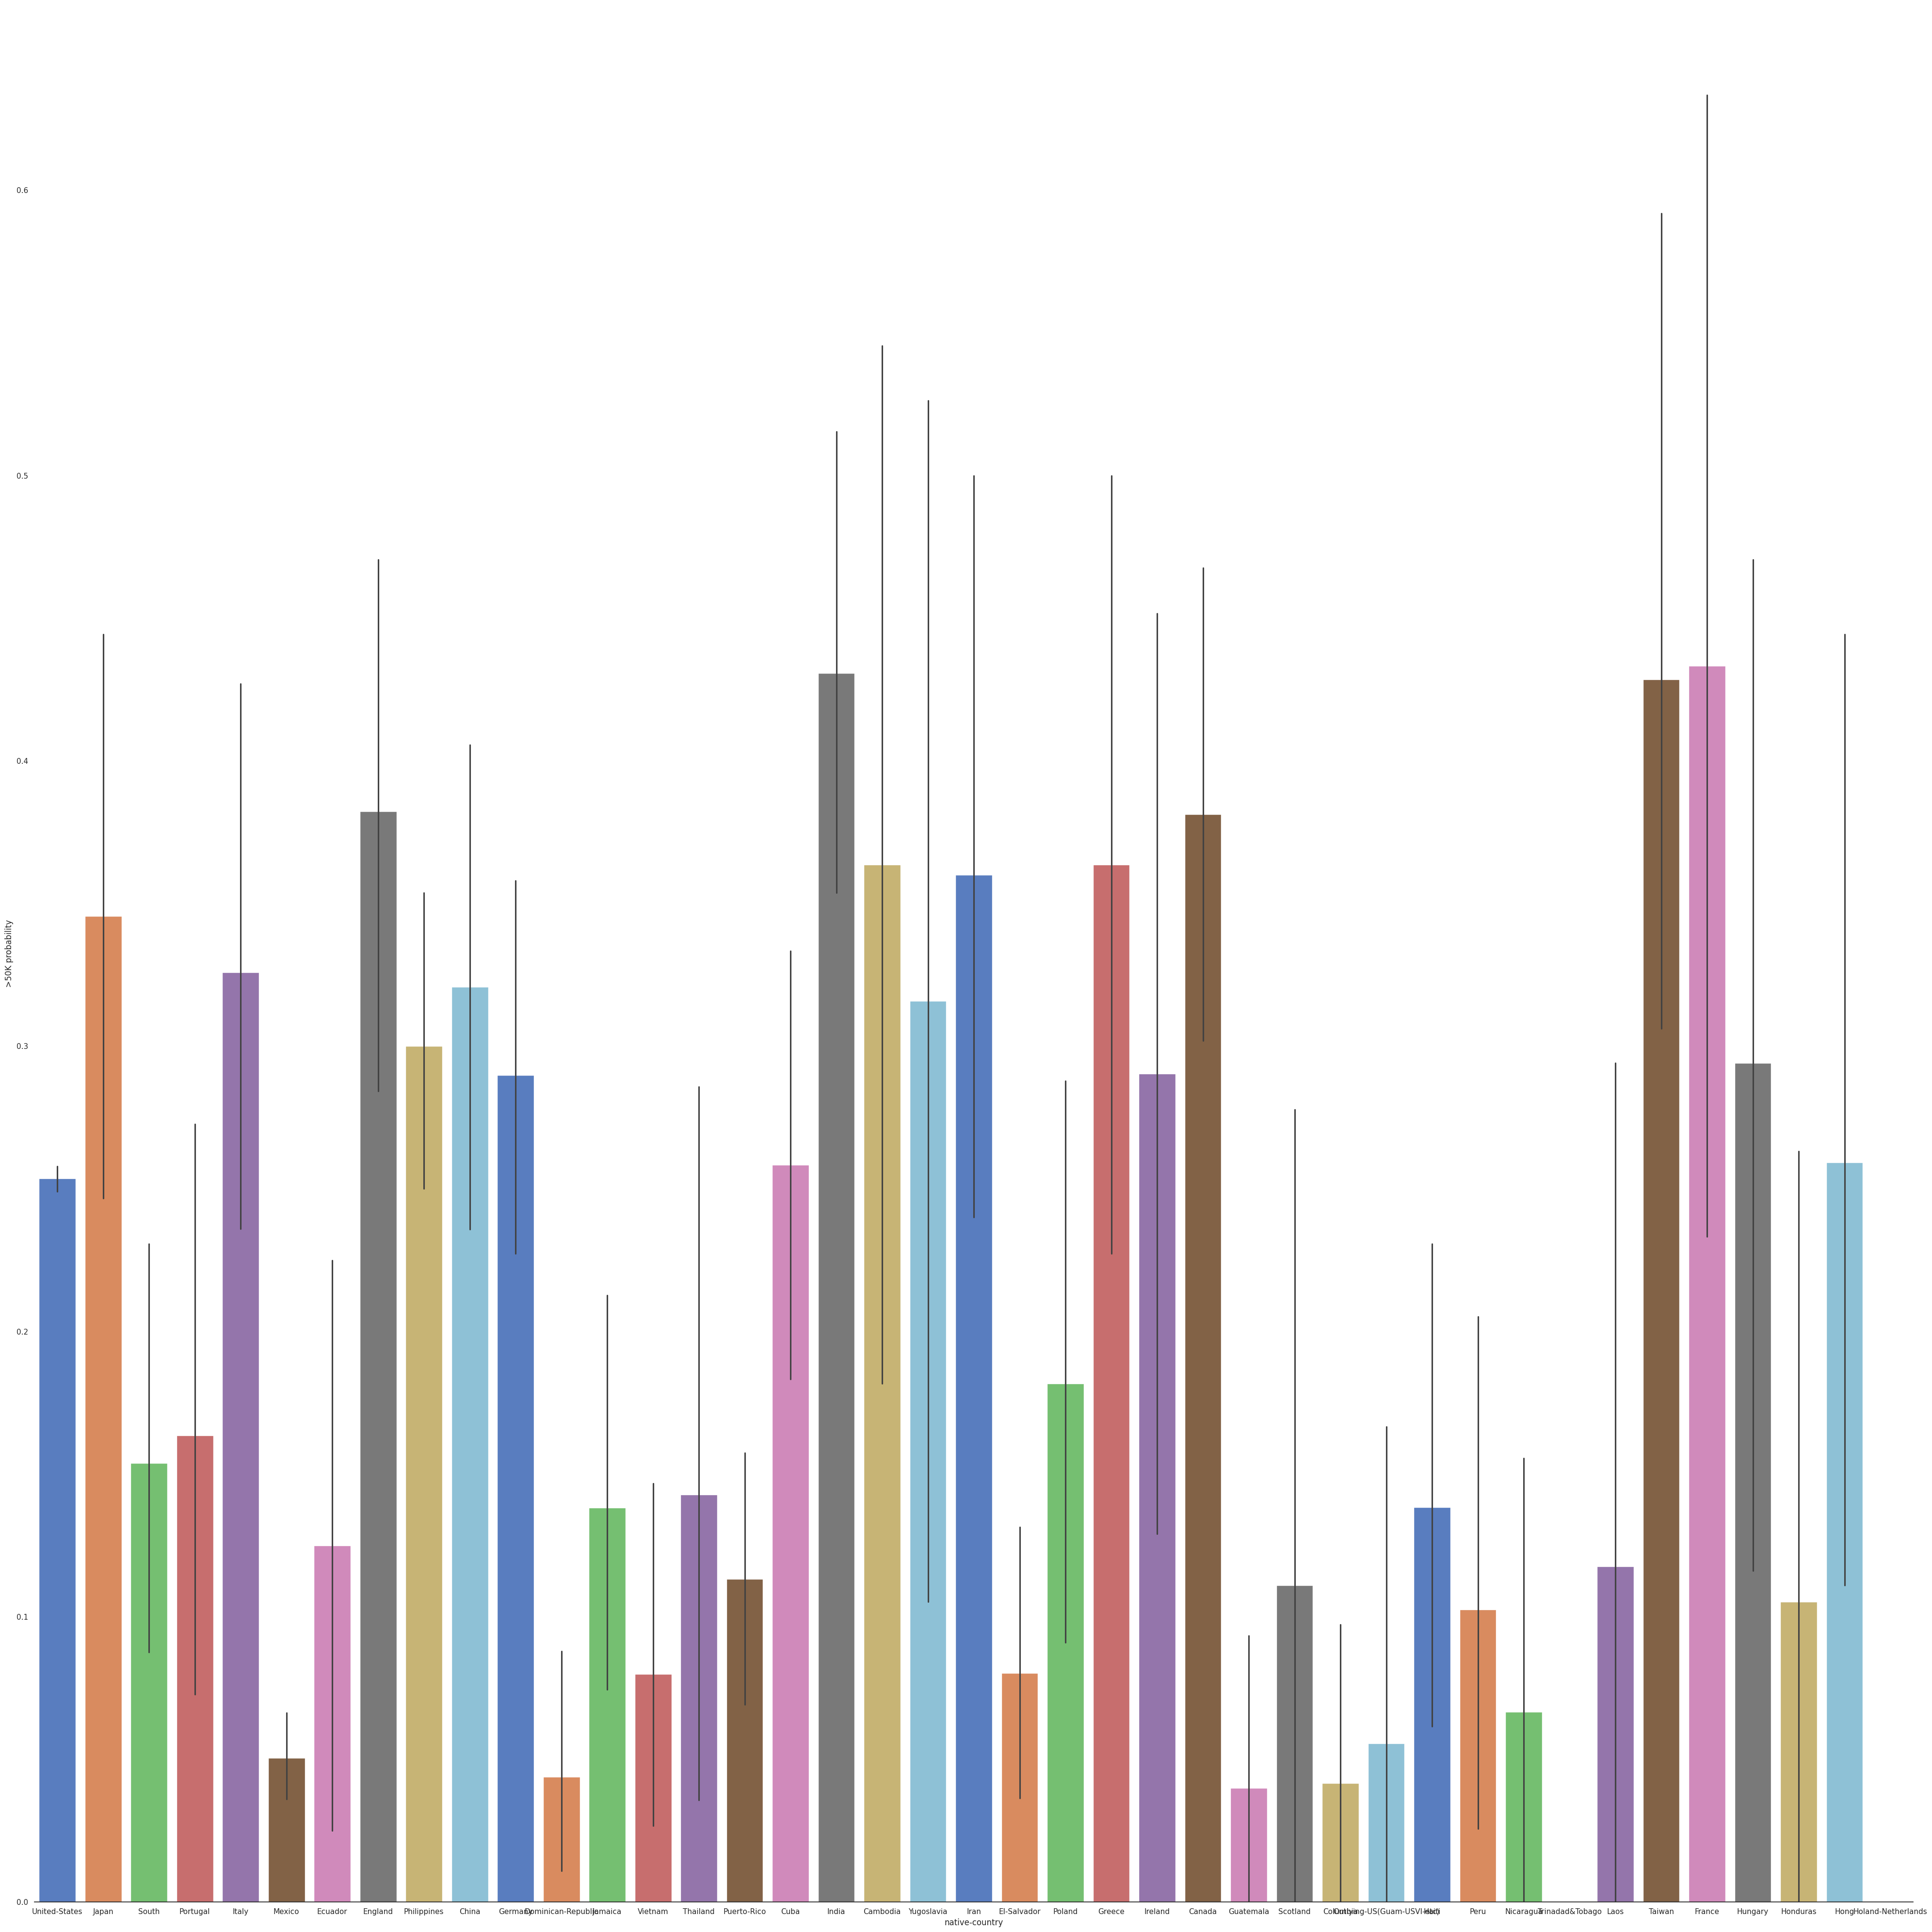

In [18]:
# Explore Native Nation vs Income
# Replace factorplot with catplot and size with height
g  = sns.catplot(x="native-country",y="exceeds50K",data=dataset,kind="bar",height = 40,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

#g = sns.barplot(x="native-country",y="exceeds50K",data=dataset)
#g = g.set_ylabel("Income >50K Probability")
plt.show()

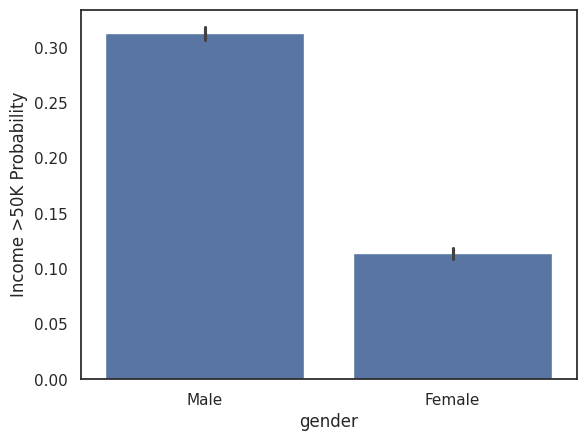

In [20]:
# Explore Sex vs Income
g = sns.barplot(x="gender",y="exceeds50K",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

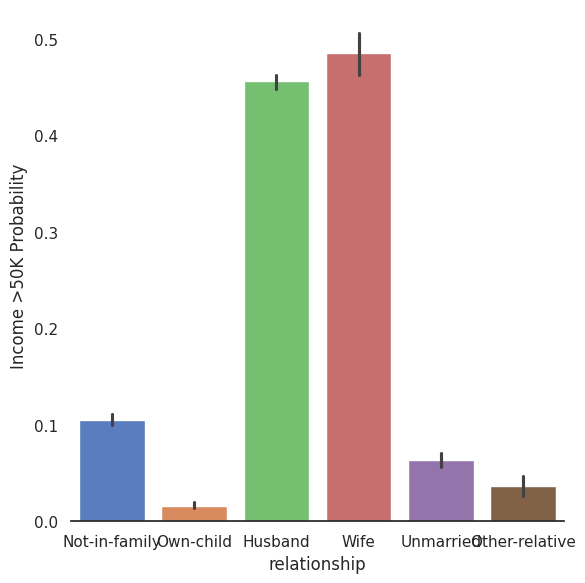

In [22]:
# Explore Relationship vs Income
g = sns.catplot(x="relationship",y="exceeds50K",data=dataset,kind="bar", height = 6 , # Changed factorplot to catplot and size to height
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

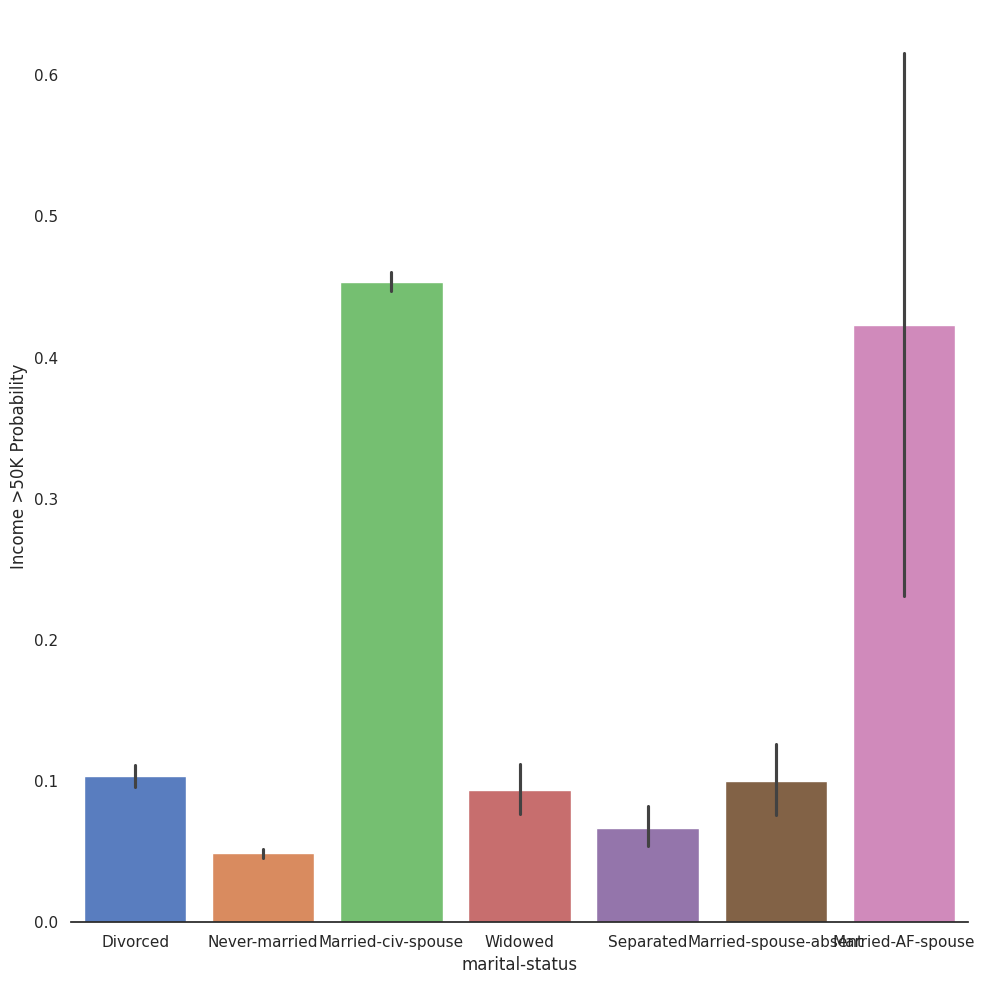

In [24]:
# Explore Marital Status vs Income
# Replace factorplot with catplot and size with height
g = sns.catplot(x="marital-status",y="exceeds50K",data=dataset,kind="bar", height = 10 , # Changed factorplot to catplot and size to height
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

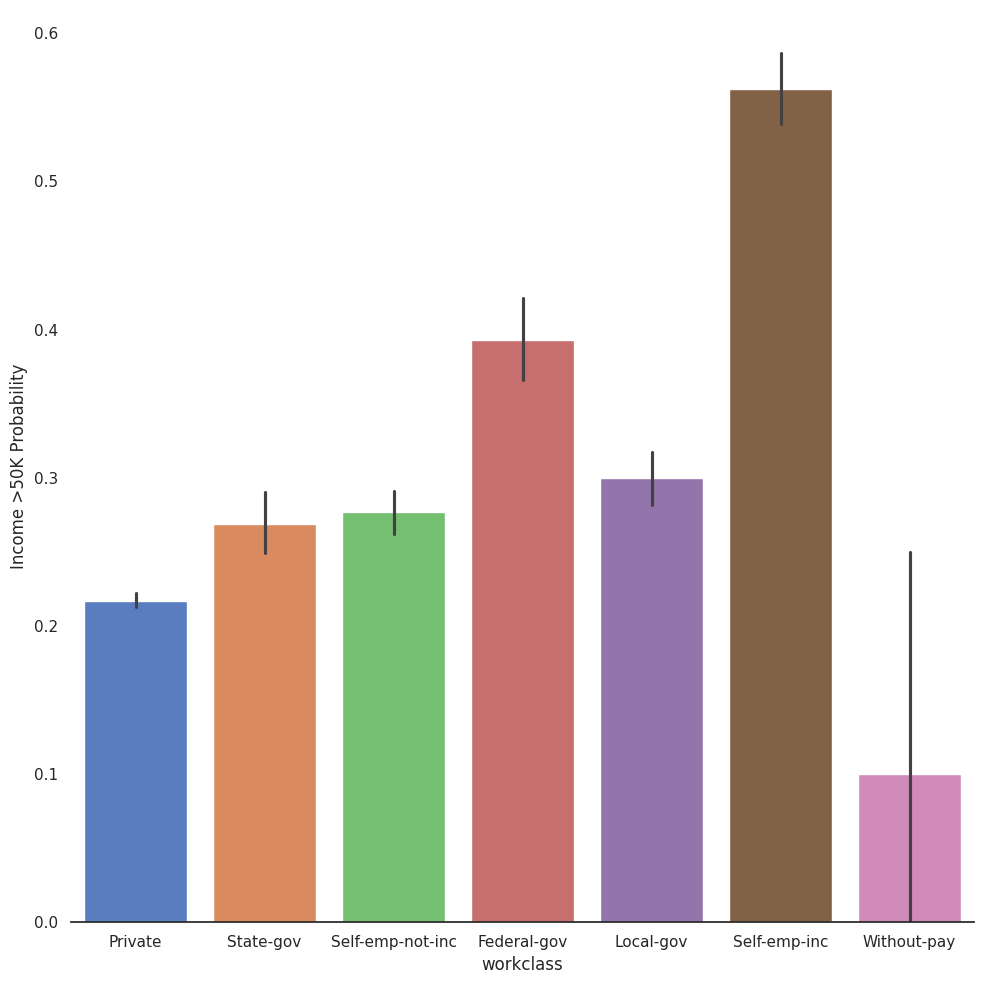

In [26]:
# Explore Workclass vs Income
# Replace factorplot with catplot and size with height
g = sns.catplot(x="workclass",y="exceeds50K",data=dataset,kind="bar", height = 10 , # Changed factorplot to catplot and size to height
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [6]:
x_train = pd.get_dummies(dataset)
x_train.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,exceeds50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,17,244602,8,0,0,15,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,31,174201,13,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,58,110199,4,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,25,149248,10,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# prompt: convert all bool dtype into int

for col in x_train.columns:
  if x_train[col].dtype == 'bool':
    x_train[col] = x_train[col].astype(int)

x_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,exceeds50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
y_train = dataset[['exceeds50K']]
y_train.head(5)

,exceeds50K
0,1
1,0
2,1
3,0
4,0


Step 3: Model Training and Testing

In [10]:
clf = RandomForestClassifier(random_state = 10, max_features='sqrt')
pipe = Pipeline([('classify', clf)])
param = {'classify__n_estimators':list(range(20, 30, 1)),
              'classify__max_depth':list(range(3, 10, 1))}
grid = GridSearchCV(pipe, param_grid=param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
{'classify__max_depth': 9, 'classify__n_estimators': 29}
0.997984560481866


Observation and Conclusion

In [11]:
# prompt: how to get the f1 score , accuracy and other things

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming you want to evaluate the best model found by GridSearchCV
best_clf = grid.best_estimator_

# Split data for evaluation (using the same splitting strategy as cross-validation is recommended)
# For simplicity, let's split the original dataset x_train and y_train again for a final evaluation report.
# In a real-world scenario, you'd typically have a separate test set not used during hyperparameter tuning.
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Make predictions on the test set
y_pred = best_clf.predict(X_test_eval)

# Print classification report (includes precision, recall, f1-score, support)
print("Classification Report:")
print(classification_report(y_test_eval, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test_eval, y_pred)
print(f"\nAccuracy Score: {accuracy}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_eval, y_pred)
print("\nConfusion Matrix:")
conf_matrix

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7652
           1       1.00      1.00      1.00      2520

    accuracy                           1.00     10172
   macro avg       1.00      1.00      1.00     10172
weighted avg       1.00      1.00      1.00     10172


Accuracy Score: 0.9993118364136846

Confusion Matrix:


array([[7652,    0],
       [   7, 2513]])